# GLOBAL POWER ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Renewable energy, encompassing diverse sources such as solar, wind, hydro, and geothermal power, offers a pathway towards decarbonizing our energy systems and mitigating the adverse effects of fossil fuel consumption. Recognizing the critical importance of this transition, this project endeavors to delve into the realm of renewable energy. Our goal is to analyze global data on renewable energy technologies, shedding light on their current contributions to the energy mix and the pace of their evolution. In doing so, we seek to provide valuable insights to stakeholders, shaping the discourse on sustainable energy and enriching our collective knowledge of renewable energy infrastructure worldwide.

 ### (b) Business Understanding

In the current era marked by energy transitions and growing sustainability imperatives, the Global Renewable Energy Generation and Capacity Analysis project endeavors to decode the intricacies of the global renewable energy landscape. Through an in-depth exploration of various renewable energy sources, their capacities, and their contributions to renewable energy generation, the project aims to offer a comprehensive overview of the global renewable energy ecosystem. These insights will equip stakeholders, policymakers, and investors with valuable knowledge about the factors influencing the renewable energy industry, enabling informed decision-making in this rapidly evolving and crucial sector.

This Global Renewable Energy Analysis is set to benefit the following stakeholders;

-  Power generation companies - for Strategic planning
-  Environmental Agencies - Providing environmental impact assessment
-  Researchers and Academia - Contributing to advancements in energy studies
-  Local communities - Informed community engagement
-  Technology providers - Market identification and growth opportunities
-  Government and Regulatory Bodies - Informed decision making
-  Energy companies and investors looking for opportunities in the renewable energy market.

### (c) Problem Statement

Since the Industrial Revolution, fossil fuels have dominated the global energy mix, leading to significant greenhouse gas emissions and health issues. To combat these challenges, there's a pressing need to transition to low-carbon energy sources like nuclear and renewables. Renewable energy, in particular, is crucial for reducing CO2 emissions and air pollution. Despite the availability of existing analysis on global renewable energy, there remains a critical gap in translating this wealth of information into actionable insights for stakeholders.Therefore, there is a pressing need for a tailored approach to renewable energy analysis that addresses the specific needs and challenges faced by stakeholders at regional and local levels. 

This project aims to fill this gap by developing a framework for localized renewable energy analysis that considers the unique characteristics and dynamics of each region.

### (d) Research Questions

- How has the production of electricity from renewable sources changed over time? <br>

- Which renewable energy source shows the most significant growth?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix?<br>


### (e) The Main Objective

To construct a predictive model utilizing worldwide energy data to precisely anticipate the generation of various energies from other energy sources.

### (f) The Specific Objectives


Specific Objectives

- To assess the role each renewable energy source plays in the overall energy blend.
- To identify opportunities to enhance the portion of renewable energy in global electricity production, optimizing the shift towards sustainable sources.
- To examine how renewable energy is distributed among different power regions.
- To identify which renewable source shows the most significant growth.
- To identify disparities in renewable energy adoption between developed and developing countries and explore the underlying factors contributing to these disparities.

### (g) Data Understanding

We obtained our dataset from 'Our World in Data,' a comprehensive source of global statistics covering various aspects of energy. By merging two distinct CSV files from 'Our World in Data,' we created a dataset comprising 7165 rows and 9 columns. This dataset encompasses annual energy data for major electricity sources from 2000 to 2022.

The merged dataset contains the following columns with their descriptions:

- `Entity` (text): This column represents the geographical entity or region for which the energy data is recorded.
- `Year` (number): This column represents the year in which the energy data was recorded or measured.
- `Electricity from wind - TWhr` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of wind energy to the total electricity generation in the specified entity and year.
- `Electricity from hydro - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of hydroelectric sources to the total electricity generation in the specified entity and year.
- `Electricity from solar - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of solar energy sources to the total electricity generation in the specified entity and year.
- `Other renewables including bioenergy - TWh` (number): This column represents the combined amount of electricity generated from other renewable sources, such as biomass, geothermal, and tidal energy, excluding wind, hydro, and solar. It's also measured in terawatt-hours (TWh).
- `Electricity from Non-Renewables - TWh` (number): This column represents the amount of electricity generated from non-renewable sources, such as fossil fuels (coal, oil, natural gas) and nuclear power, in terawatt-hours (TWh).
- `Total Renewable Electricity - TWh` (number): This column represents the total amount of electricity generated from renewable sources, including wind, hydro, solar, and other renewables, in terawatt-hours (TWh).
- `Electricity generation - TWh` (number): This column represents the total electricity generated from all sources, both renewable and non-renewable, in terawatt-hours (TWh).


These columns provide a comprehensive overview of the electricity generation landscape, detailing the contributions of various renewable and non-renewable sources over time.


The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

## 2. Data Cleaning

**Importing libraries**

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  
import pickle
import datetime as dt  
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

###### Loading 1st CSV

In [2]:
# Read CSV file into data frame
df = pd.read_csv('modern-renewable-prod.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.400000
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.289999
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.540000
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.250000
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.039999


In [4]:
# Display the shape of the DataFrame
df.shape

(8961, 7)

In [5]:
# drop uneccesary column
df.drop(columns=['Code'], inplace= True)

In [6]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Year                                        8961 non-null   int64  
 2   Electricity from wind - TWh                 8000 non-null   float64
 3   Electricity from hydro - TWh                8863 non-null   float64
 4   Electricity from solar - TWh                7956 non-null   float64
 5   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 420.2+ KB


##### Load 2nd CSV

In [7]:
df2 = pd.read_csv('electricity-generation.csv')
df2

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,368.08
1,ASEAN (Ember),NaN,2001,396.60
2,ASEAN (Ember),NaN,2002,423.11
3,ASEAN (Ember),NaN,2003,447.70
4,ASEAN (Ember),NaN,2004,485.55
...,...,...,...,...
7190,Zimbabwe,ZWE,2017,7.35
7191,Zimbabwe,ZWE,2018,9.19
7192,Zimbabwe,ZWE,2019,8.24
7193,Zimbabwe,ZWE,2020,7.59


In [8]:
df2.drop(columns=['Code'], inplace=True)
df2

,Entity,Year,Electricity generation - TWh
0,ASEAN (Ember),2000,368.08
1,ASEAN (Ember),2001,396.60
2,ASEAN (Ember),2002,423.11
3,ASEAN (Ember),2003,447.70
4,ASEAN (Ember),2004,485.55
...,...,...,...
7190,Zimbabwe,2017,7.35
7191,Zimbabwe,2018,9.19
7192,Zimbabwe,2019,8.24
7193,Zimbabwe,2020,7.59


In [9]:
df2.isna().sum()

Entity                          0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### Load 3rd CSV

In [10]:
df3 = pd.read_csv('urban-and-rural-population.csv')
df3

,Entity,Code,Year,Urban population,Rural population
0,Afghanistan,AFG,1960,724373,7898093.0
1,Afghanistan,AFG,1961,763336,8026804.0
2,Afghanistan,AFG,1962,805062,8163985.0
3,Afghanistan,AFG,1963,849446,8308019.0
4,Afghanistan,AFG,1964,896820,8458694.0
...,...,...,...,...,...
14163,Zimbabwe,ZWE,2017,4755312,9995789.0
14164,Zimbabwe,ZWE,2018,4848158,10204026.0
14165,Zimbabwe,ZWE,2019,4945719,10408889.0
14166,Zimbabwe,ZWE,2020,5052214,10617452.0


In [11]:
df3.drop(columns=['Code'], inplace=True)
df3

,Entity,Year,Urban population,Rural population
0,Afghanistan,1960,724373,7898093.0
1,Afghanistan,1961,763336,8026804.0
2,Afghanistan,1962,805062,8163985.0
3,Afghanistan,1963,849446,8308019.0
4,Afghanistan,1964,896820,8458694.0
...,...,...,...,...
14163,Zimbabwe,2017,4755312,9995789.0
14164,Zimbabwe,2018,4848158,10204026.0
14165,Zimbabwe,2019,4945719,10408889.0
14166,Zimbabwe,2020,5052214,10617452.0


##### Merging the three CSVs

In [12]:
# df and df have 2 similar columns, Entity and Year. We'll merge on the two columns
merge_df = pd.merge(df, df2, on=['Entity', 'Year'], how='inner')

In [13]:
merge_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


In [14]:
merged_df = pd.merge(merge_df, df3, on=['Entity', 'Year'], how='inner')
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0
...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0


In [15]:
# Display descriptive statistics of the DataFrame
merged_df.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
count,5799.000000,5640.000000,5736.000000,5599.000000,5611.000000,5799.000000,5.799000e+03,5.799000e+03
mean,2006.521469,7.606038,58.652696,2.772883,6.432781,351.880592,6.090656e+07,6.089809e+07
std,9.648417,65.017414,295.958151,29.757392,36.535950,1802.214206,2.957410e+08,3.119375e+08
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.398000e+03,0.000000e+00
25%,2000.000000,0.000000,0.020750,0.000000,0.000000,1.810000,1.218654e+06,6.087415e+05
50%,2007.000000,0.000000,1.760000,0.000000,0.010000,14.840000,4.700302e+06,2.980799e+06
75%,2014.000000,0.060000,11.799250,0.017200,0.670000,67.710000,1.760226e+07,1.256642e+07
max,2021.000000,1848.280000,4339.530000,1047.060000,750.280000,28002.920000,4.454153e+09,3.435444e+09


In [16]:
#Check the unique values in each column
merged_df.nunique()

Entity                                         207
Year                                            37
Electricity from wind - TWh                    832
Electricity from hydro - TWh                  2524
Electricity from solar - TWh                   545
Other renewables including bioenergy - TWh    1339
Electricity generation - TWh                  3849
Urban population                              5797
Rural population                              5598
dtype: int64

In [17]:
merged_df.isna().sum()

Entity                                          0
Year                                            0
Electricity from wind - TWh                   159
Electricity from hydro - TWh                   63
Electricity from solar - TWh                  200
Other renewables including bioenergy - TWh    188
Electricity generation - TWh                    0
Urban population                                0
Rural population                                0
dtype: int64

In [18]:
#fill nulls
merged_df.fillna(0, inplace=True)

In [19]:
merged_df.isna().sum()

Entity                                        0
Year                                          0
Electricity from wind - TWh                   0
Electricity from hydro - TWh                  0
Electricity from solar - TWh                  0
Other renewables including bioenergy - TWh    0
Electricity generation - TWh                  0
Urban population                              0
Rural population                              0
dtype: int64

In [20]:
merged_df.dtypes

Entity                                         object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Electricity generation - TWh                  float64
Urban population                                int64
Rural population                              float64
dtype: object

In [21]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0
...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0


### Feature Engineering

In [22]:
# 1. Total Renewable Electricity - TWh
merged_df['Total Renewable Electricity - TWh'] = merged_df['Electricity from wind - TWh'] + merged_df['Electricity from hydro - TWh'] + merged_df['Electricity from solar - TWh'] + merged_df['Other renewables including bioenergy - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population,Total Renewable Electricity - TWh
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0,0.31
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0,0.50
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0,0.56
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0,0.63
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0,0.56
...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0,4.30
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0,5.46
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0,4.58
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0,4.19


In [23]:
# 2. Non-Renewable Electricity - TWh
merged_df['Electricity from Non-Renewables - TWh'] = merged_df['Electricity generation - TWh'] - merged_df['Total Renewable Electricity - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0,0.31,0.16
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0,0.50,0.09
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0,0.56,0.13
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0,0.63,0.31
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0,0.56,0.33
...,...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0,4.30,3.05
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0,5.46,3.73
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0,4.58,3.66
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0,4.19,3.40


In [24]:
# 3. Urbanisation
# Calculate total population (urban + rural)
merged_df['Total Population'] = merged_df['Urban population'] + merged_df['Rural population']

# Calculate urbanization (%)
merged_df['Urbanization'] = (merged_df['Urban population'] / merged_df['Total Population']) * 100

merged_df.drop(columns=['Total Population', 'Urban population', 'Rural population'], inplace=True)

In [25]:
merged_df[merged_df['Entity'] == 'World']

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
5696,World,1985,0.064220,1979.2446,0.011747,78.69558,9886.0625,2058.016148,7828.046352,41.189438
5697,World,1986,0.138831,2006.0651,0.015184,85.43938,10180.7910,2091.658495,8089.132505,41.553509
5698,World,1987,0.195377,2033.1884,0.010603,91.51002,10670.6220,2124.904400,8545.717600,41.920416
5699,World,1988,0.331580,2098.3518,0.010196,94.15391,11140.6280,2192.847486,8947.780514,42.287307
5700,World,1989,2.649777,2087.5880,0.262223,104.66536,11657.9540,2195.165360,9462.788640,42.643921
5701,World,1990,3.632471,2158.8540,0.388350,117.21735,11960.9590,2280.092171,9680.866829,43.003348
5702,World,1991,4.086107,2208.7020,0.505323,122.25421,12222.0550,2335.547640,9886.507360,43.371478
5703,World,1992,4.732812,2208.4592,0.466679,131.14992,12335.9470,2344.808611,9991.138389,43.736169
5704,World,1993,5.704169,2341.4597,0.556678,135.47186,12599.4795,2483.192407,10116.287093,44.094820
5705,World,1994,7.131730,2356.2030,0.596983,140.66844,12923.5830,2504.600153,10418.982847,44.456469


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [26]:
merged_df.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh', 'Urbanization'],
      dtype='object')

### (a) Univariate Data Analysis

Univariate Analysis:


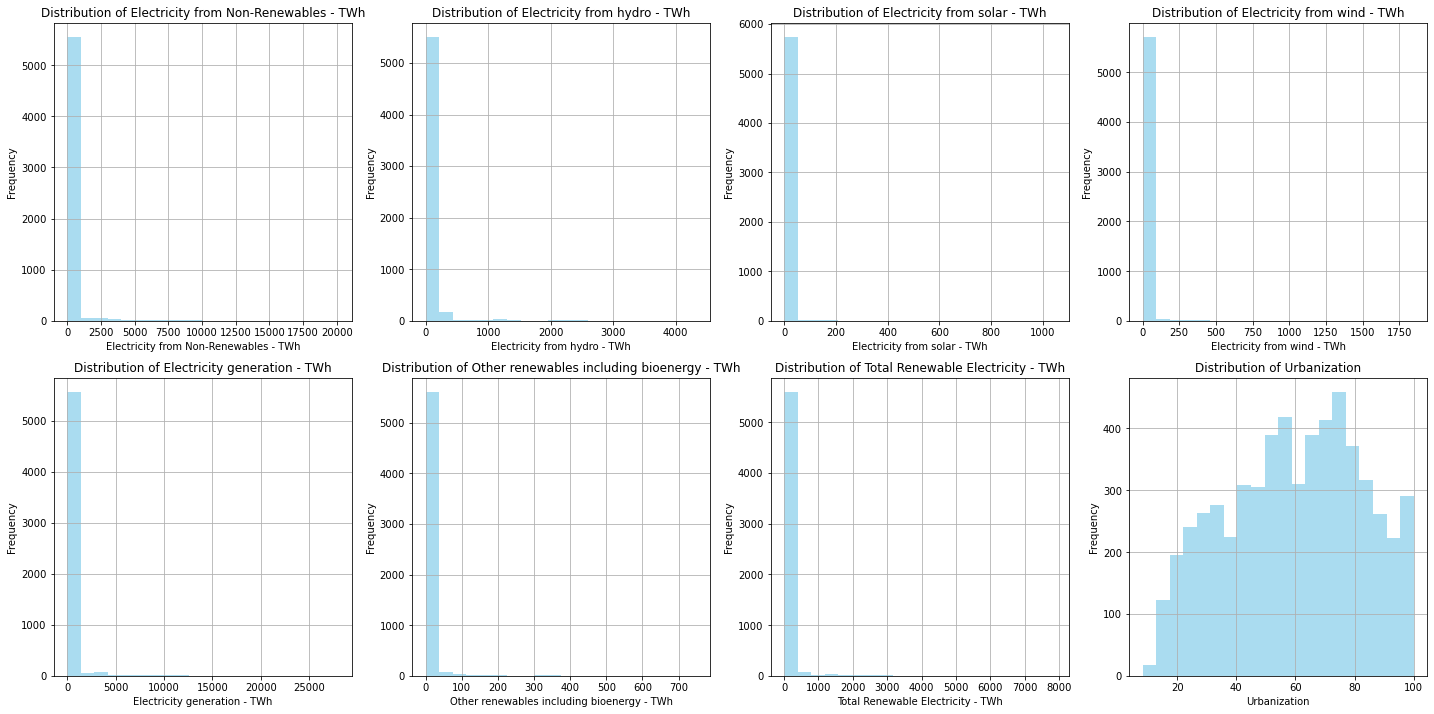

In [27]:
# Univariate Analysis with histograms
print("Univariate Analysis:")
num_cols = merged_df.columns.difference(['Entity', 'Year'])  # Exclude non-numeric columns
num_plots = len(num_cols)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, col in enumerate(num_cols):
    row_index = i // (num_plots // 2 + num_plots % 2)
    col_index = i % (num_plots // 2 + num_plots % 2)
    merged_df[col].hist(ax=axes[row_index, col_index], bins=20, color='skyblue', alpha=0.7)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout(pad=1.0)
plt.show()

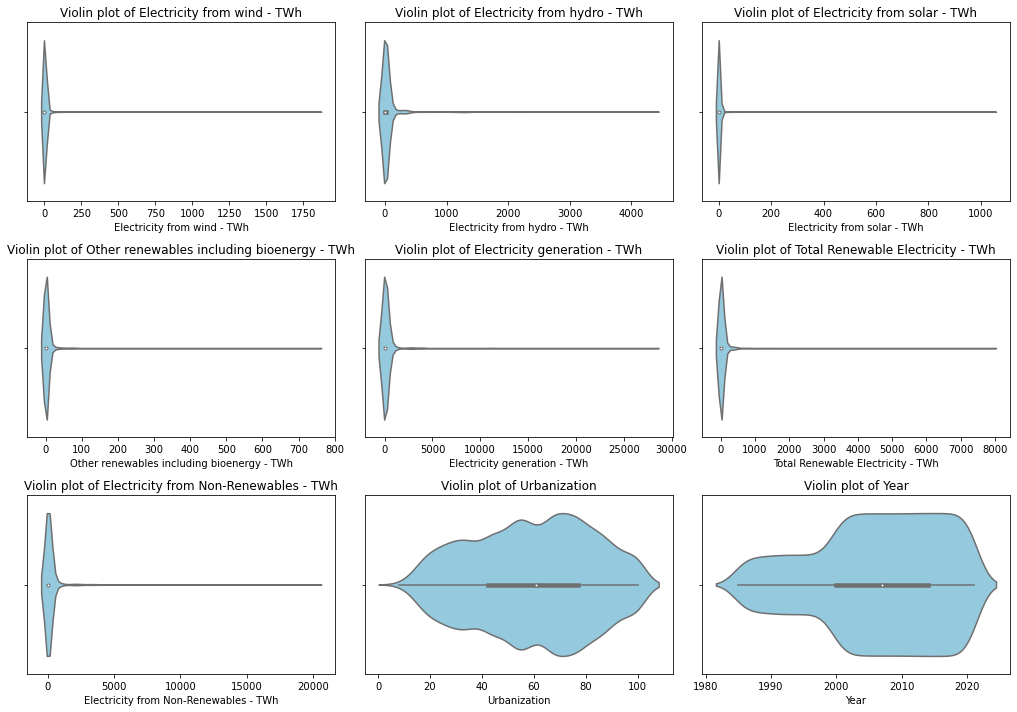

In [28]:
electricity_cols = ['Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh',
                    'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
                    'Electricity from Non-Renewables - TWh', 'Urbanization', 'Year']

plt.figure(figsize=(14, 10))  # Adjust the figure size

# Create subplots
for i, col in enumerate(electricity_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=merged_df[col], color='skyblue')  # Use violin plot instead of box plot
    plt.title(f'Violin plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


### (b) Bivariate Data Analysis

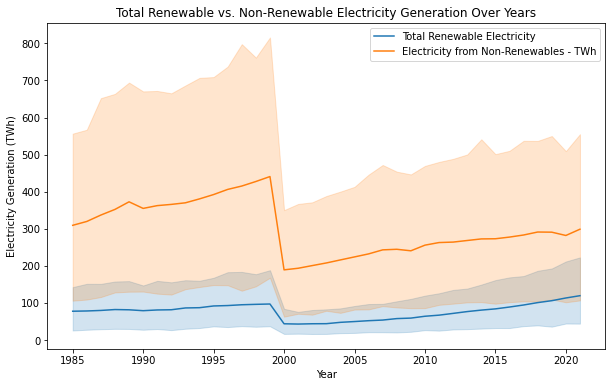

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Total Renewable Electricity - TWh', label='Total Renewable Electricity')
sns.lineplot(data=merged_df, x='Year', y='Electricity from Non-Renewables - TWh', label='Electricity from Non-Renewables - TWh')
plt.title('Total Renewable vs. Non-Renewable Electricity Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.show()

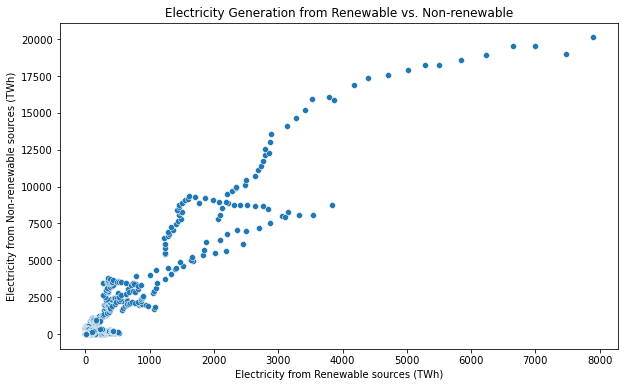

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Total Renewable Electricity - TWh', y='Electricity from Non-Renewables - TWh')
plt.title('Electricity Generation from Renewable vs. Non-renewable')
plt.xlabel('Electricity from Renewable sources (TWh)')
plt.ylabel('Electricity from Non-renewable sources (TWh)')
plt.show()

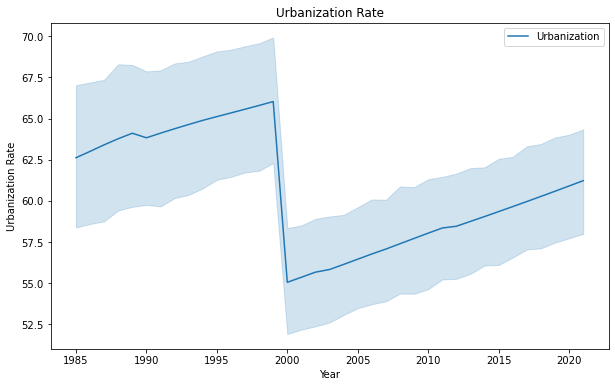

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Urbanization', label='Urbanization')
plt.title('Urbanization Rate')
plt.xlabel('Year')
plt.ylabel('Urbanization Rate')
plt.legend()
plt.show()

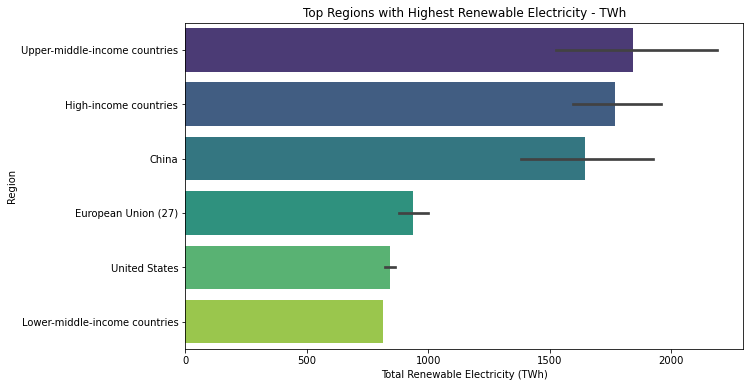

In [32]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_renewable_regions = df_filtered.sort_values(by='Total Renewable Electricity - TWh', ascending=False).head(85)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_renewable_regions, x='Total Renewable Electricity - TWh', y='Entity', palette='viridis')
plt.title('Top Regions with Highest Renewable Electricity - TWh')
plt.xlabel('Total Renewable Electricity (TWh)')
plt.ylabel('Region')
plt.show()

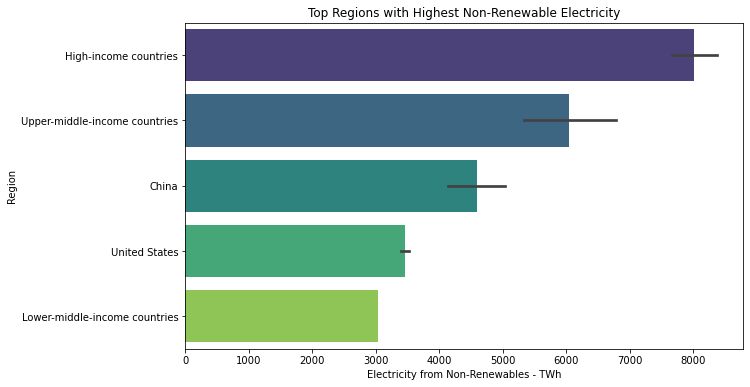

In [33]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_non_renewable_regions = df_filtered.sort_values(by='Electricity from Non-Renewables - TWh', ascending=False).head(100)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_non_renewable_regions, x='Electricity from Non-Renewables - TWh', y='Entity', palette='viridis')
plt.title('Top Regions with Highest Non-Renewable Electricity')
plt.xlabel('Electricity from Non-Renewables - TWh')
plt.ylabel('Region')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

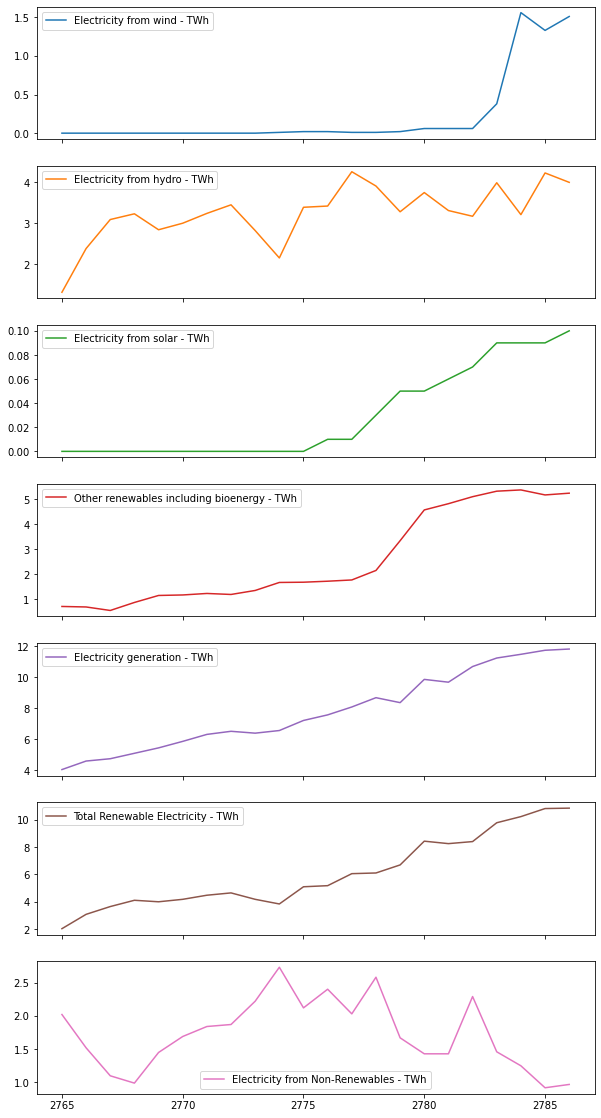

In [34]:
merged_df.loc[merged_df['Entity'] == 'Kenya', ['Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']].plot(figsize=(10,20), subplots= True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

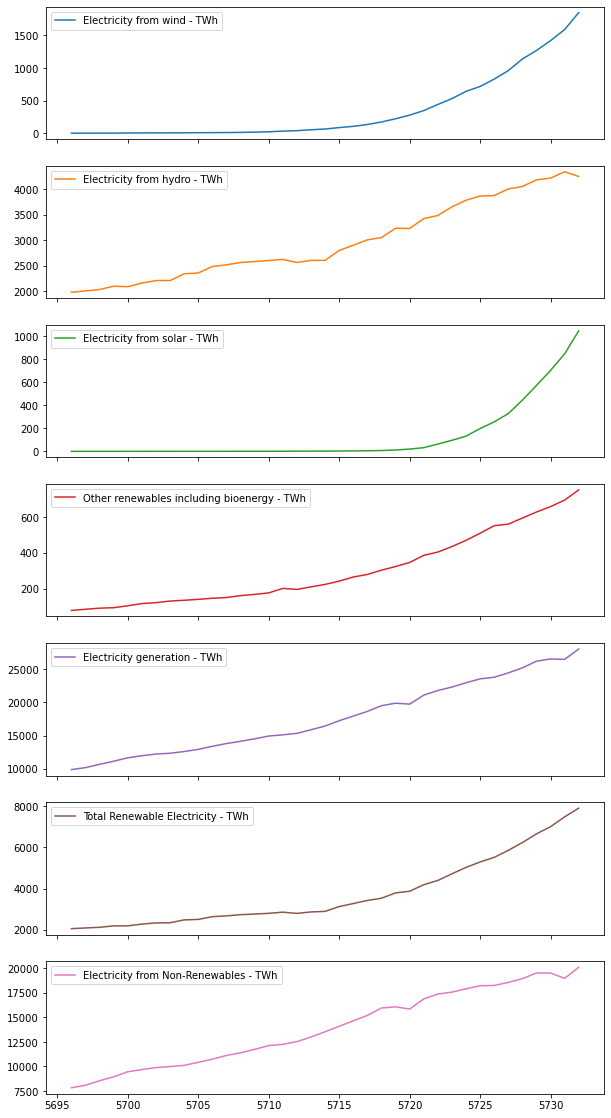

In [35]:
merged_df.loc[merged_df['Entity'] == 'World', ['Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']].plot(figsize=(10,20), subplots= True)

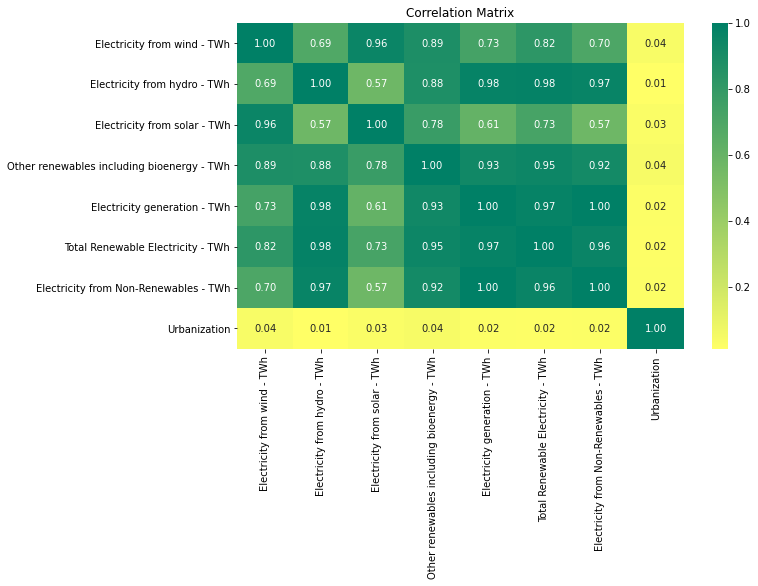

In [36]:
# Correlation Analysis
correlation_matrix = merged_df.drop(columns=['Entity', 'Year']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='summer_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
merged_df.to_csv('modelling.csv', index=False)

### Trends in Renewable Energy Generation Over Time

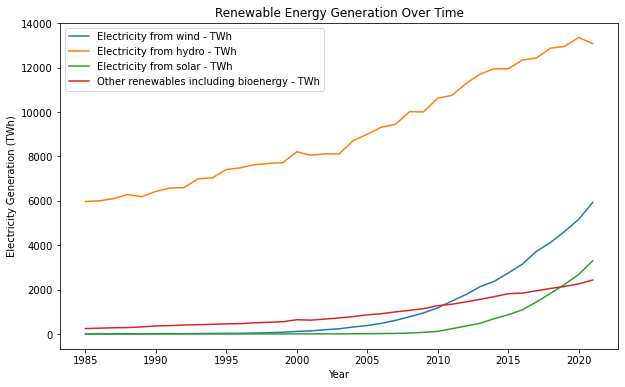

In [104]:
# Group data by year and calculate the sum of renewable energy generation
renewable_generation = merged_df.groupby('Year')[['Electricity from wind - TWh', 'Electricity from hydro - TWh',
                                           'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh']].sum()

# Plot renewable energy generation over time
renewable_generation.plot(kind='line', figsize=(10, 6))
plt.title('Renewable Energy Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.show()

### Comparison of Renewable vs. Non-Renewable Energy Generation

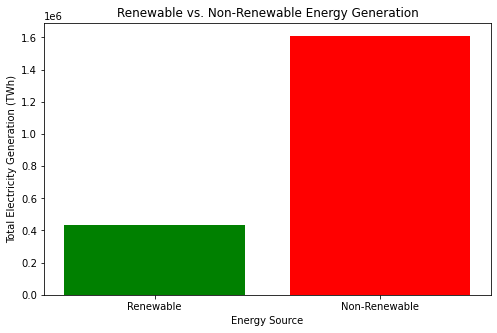

In [105]:
# Calculate the sum of renewable and non-renewable energy generation
total_renewable = merged_df['Total Renewable Electricity - TWh'].sum()
total_non_renewable = merged_df['Electricity from Non-Renewables - TWh'].sum()

# Plot renewable vs. non-renewable energy generation
plt.figure(figsize=(8, 5))
plt.bar(['Renewable', 'Non-Renewable'], [total_renewable, total_non_renewable], color=['green', 'red'])
plt.title('Renewable vs. Non-Renewable Energy Generation')
plt.xlabel('Energy Source')
plt.ylabel('Total Electricity Generation (TWh)')
plt.show()

### Impact of Urbanization on Electricity Consumption

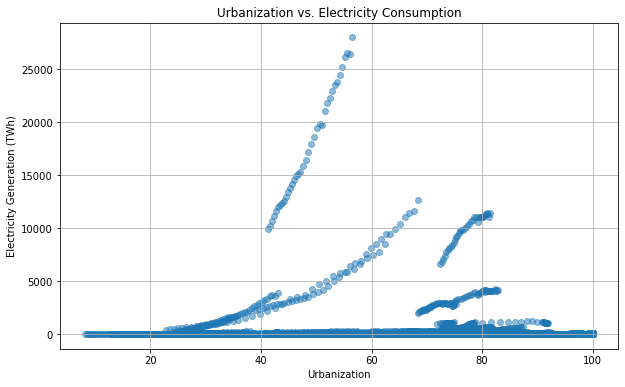

In [106]:
# Plot urbanization vs. electricity consumption
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Urbanization'], merged_df['Electricity generation - TWh'], alpha=0.5)
plt.title('Urbanization vs. Electricity Consumption')
plt.xlabel('Urbanization')
plt.ylabel('Electricity Generation (TWh)')
plt.grid(True)
plt.show()


### Regional Comparison of Renewable Energy Adoption

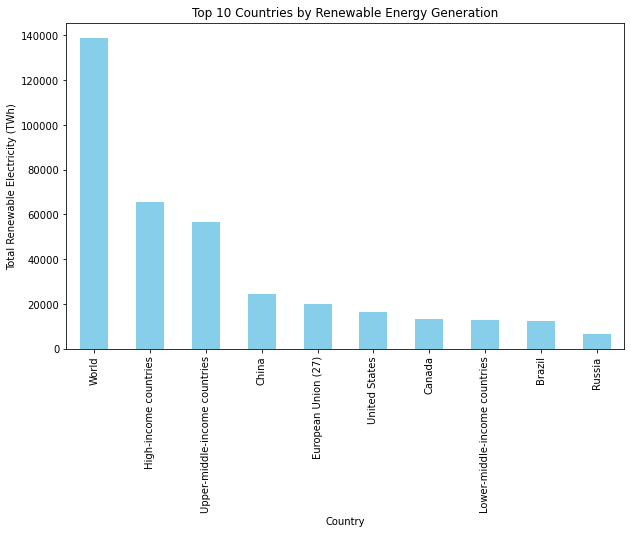

In [108]:
# Group data by entity (country) and calculate the total renewable energy generation
renewable_by_entity = merged_df.groupby('Entity')['Total Renewable Electricity - TWh'].sum().sort_values(ascending=False)

# Plot top 10 countries with the highest renewable energy generation
top_renewable_countries = renewable_by_entity.head(10)
top_renewable_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries by Renewable Energy Generation')
plt.xlabel('Country')
plt.ylabel('Total Renewable Electricity (TWh)')
plt.xticks(rotation=90)
plt.show()

### Forecasting Future Renewable Energy Production

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

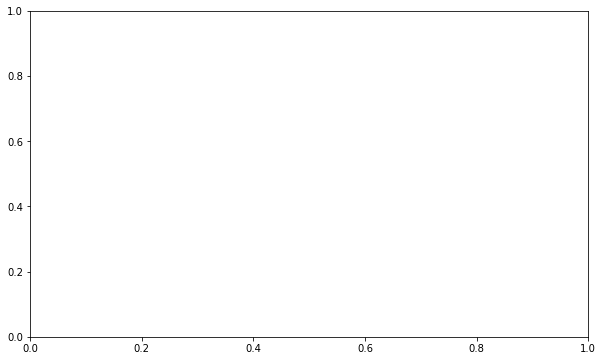

In [112]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert DataFrame to multidimensional array
data_array = merged_df['Total Renewable Electricity - TWh'].values

# Fit ARIMA model
model = ARIMA(data_array, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for future years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future year indices
future_years = np.arange(merged_df['Year'].max() + 1, merged_df['Year'].max() + forecast_steps + 1)

# Plot actual vs. forecasted renewable energy production
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Total Renewable Electricity - TWh'], label='Actual')
plt.plot(future_years, forecast, label='Forecast')
plt.title('Actual vs. Forecasted Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Total Renewable Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()

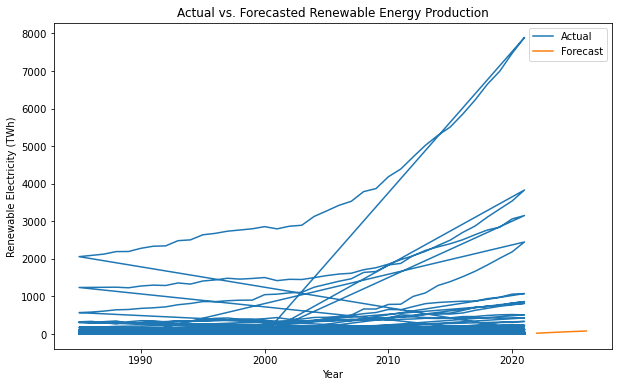

In [113]:
# Convert the Pandas Series to a 1D NumPy array before plotting
x_values = merged_df['Year'].to_numpy()
y_values = merged_df['Total Renewable Electricity - TWh'].to_numpy()

# Now plot using the converted arrays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Actual')

# Assuming future_years is already a suitable array and forecast is a suitable sequence
plt.plot(future_years, forecast, label='Forecast')

plt.title('Actual vs. Forecasted Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (TWh)')
plt.legend()
plt.show()

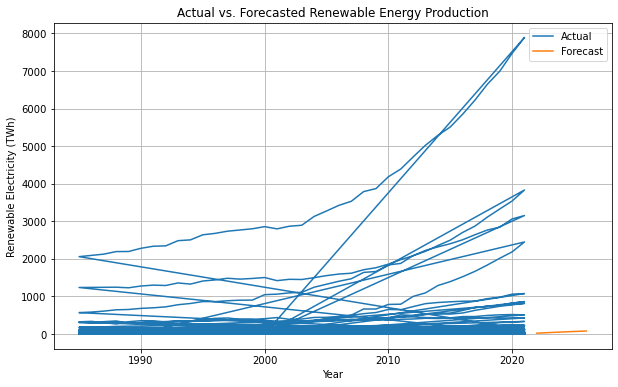

In [114]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert the Pandas Series to a 1D NumPy array before plotting
x_values = merged_df['Year'].to_numpy()
y_values = merged_df['Total Renewable Electricity - TWh'].to_numpy()

# Fit ARIMA model
model = ARIMA(y_values, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for future years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future year indices
future_years = np.arange(merged_df['Year'].max() + 1, merged_df['Year'].max() + forecast_steps + 1)

# Now plot using the converted arrays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Actual')
plt.plot(future_years, forecast, label='Forecast')

plt.title('Actual vs. Forecasted Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# Calculate error metrics
mae = mean_absolute_error(y_values[-forecast_steps:], forecast)
mse = mean_squared_error(y_values[-forecast_steps:], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_values[-forecast_steps:], forecast)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R^2) Score:', r2)

Mean Absolute Error (MAE): 46.53353265504795
Mean Squared Error (MSE): 2590.2565576737657
Root Mean Squared Error (RMSE): 50.89456314454193
R-squared (R^2) Score: -12573.0609595814


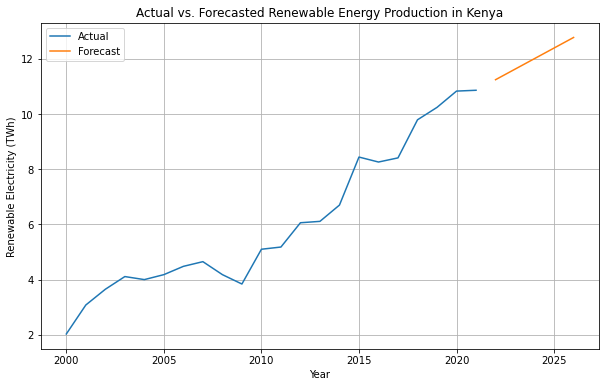

In [116]:
# Filter the DataFrame to include data only for Kenya
kenya_df = merged_df[merged_df['Entity'] == 'Kenya']

# Convert the Pandas Series to a 1D NumPy array before plotting
x_values = kenya_df['Year'].to_numpy()
y_values = kenya_df['Total Renewable Electricity - TWh'].to_numpy()

# Fit ARIMA model
model = ARIMA(y_values, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for future years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future year indices
future_years = np.arange(kenya_df['Year'].max() + 1, kenya_df['Year'].max() + forecast_steps + 1)

# Now plot using the converted arrays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Actual')
plt.plot(future_years, forecast, label='Forecast')

plt.title('Actual vs. Forecasted Renewable Energy Production in Kenya')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Calculate error metrics
mae = mean_absolute_error(y_values[-forecast_steps:], forecast)
mse = mean_squared_error(y_values[-forecast_steps:], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_values[-forecast_steps:], forecast)

# Print error metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 1.981893271809773
Mean Squared Error (MSE): 4.1225724140501665
Root Mean Squared Error (RMSE): 2.0304118828578024
R-squared (R2) Score: -4.083419157874437


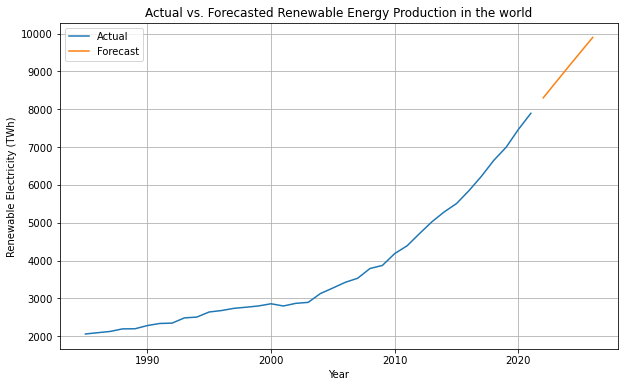

In [119]:
# Filter the DataFrame to include data only for the world
world_df = merged_df[merged_df['Entity'] == 'World']

# Convert the Pandas Series to a 1D NumPy array before plotting
x_values = world_df['Year'].to_numpy()
y_values =world_df['Total Renewable Electricity - TWh'].to_numpy()

# Fit ARIMA model
model = ARIMA(y_values, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for future years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future year indices
future_years = np.arange(world_df['Year'].max() + 1, world_df['Year'].max() + forecast_steps + 1)

# Now plot using the converted arrays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Actual')
plt.plot(future_years, forecast, label='Forecast')

plt.title('Actual vs. Forecasted Renewable Energy Production in the world')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def country_renewable_energy_forecast(country_name, merged_df, order=(1, 1, 1), forecast_steps=5):
    # Filter the DataFrame to include data only for the specified country
    country_df = merged_df[merged_df['Entity'] == country_name]

    # Convert the Pandas Series to a 1D NumPy array
    x_values = country_df['Year'].to_numpy()
    y_values = country_df['Total Renewable Electricity - TWh'].to_numpy()

    # Fit ARIMA model
    model = ARIMA(y_values, order=order)
    model_fit = model.fit()

    # Forecast for future years
    forecast = model_fit.forecast(steps=forecast_steps)

    # Generate future year indices
    future_years = np.arange(country_df['Year'].max() + 1, country_df['Year'].max() + forecast_steps + 1)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Actual')
    plt.plot(future_years, forecast, label='Forecast')

    plt.title(f'Actual vs. Forecasted Renewable Energy Production in {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Renewable Electricity (TWh)')
    plt.legend()
    plt.grid(True)
    plt.show()

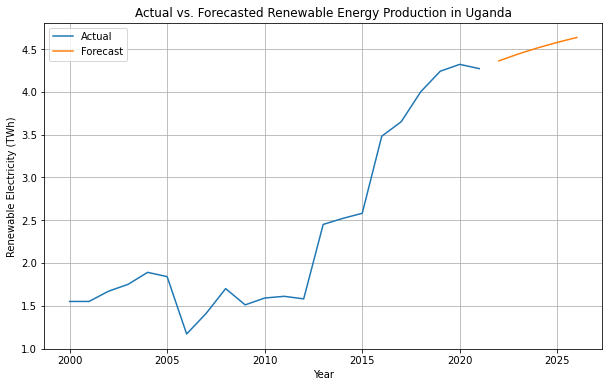

In [121]:
country_renewable_energy_forecast('Uganda', merged_df)

In [127]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def country_renewable_energy_forecast(country_name, merged_df, order=(1, 1, 1), forecast_steps=5):
    # Filter the DataFrame to include data only for the specified country
    country_df = merged_df[merged_df['Entity'] == country_name]

    # Convert the Pandas Series to a 1D NumPy array
    x_values = country_df['Year'].to_numpy()
    y_values = country_df['Total Renewable Electricity - TWh'].to_numpy()

    # Fit ARIMA model
    model = ARIMA(y_values, order=order)
    model_fit = model.fit()

    # Forecast for future years
    forecast = model_fit.forecast(steps=forecast_steps)

    # Generate future year indices
    future_years = np.arange(country_df['Year'].max() + 1, country_df['Year'].max() + forecast_steps + 1)

    # Return the forecasted values and the corresponding years
    return future_years, forecast

# Example usage
forecast_years, forecast_values = country_renewable_energy_forecast('Kenya', merged_df, forecast_steps=5)
print("Forecasted renewable electricity production for Kenya:")
for year, value in zip(forecast_years, forecast_values):
    print(f"Year {year}: {value} TWh")

Forecasted renewable electricity production for Kenya:
Year 2022: 11.242647159041113 TWh
Year 2023: 11.625282231467505 TWh
Year 2024: 12.007905217660953 TWh
Year 2025: 12.390516118003223 TWh
Year 2026: 12.77311493287607 TWh


In [128]:
forecast_years, forecast_values = country_renewable_energy_forecast('World', merged_df, forecast_steps=5)
print("Forecasted renewable electricity production for World:")
for year, value in zip(forecast_years, forecast_values):
    print(f"Year {year}: {value} TWh")

Forecasted renewable electricity production for World:
Year 2022: 8300.008981514839 TWh
Year 2023: 8704.645734350783 TWh
Year 2024: 9105.66292844243 TWh
Year 2025: 9503.092941485114 TWh
Year 2026: 9896.96786154904 TWh


In [129]:
forecast_years, forecast_values = country_renewable_energy_forecast('Uganda', merged_df, forecast_steps=5)
print("Forecasted renewable electricity production for Kenya:")
for year, value in zip(forecast_years, forecast_values):
    print(f"Year {year}: {value} TWh")

Forecasted renewable electricity production for Kenya:
Year 2022: 4.3604824929566695 TWh
Year 2023: 4.441130082730958 TWh
Year 2024: 4.513011764190782 TWh
Year 2025: 4.577080338886598 TWh
Year 2026: 4.63418504456669 TWh


## 4. MODELLING 


##### (a) Time Series - ARIMA

In [38]:
data = pd.read_csv('modelling.csv')
data.head()

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
0,Afghanistan,2000,0.0,0.31,0.0,0.0,0.47,0.31,0.16,22.078002
1,Afghanistan,2001,0.0,0.50,0.0,0.0,0.59,0.50,0.09,22.169001
2,Afghanistan,2002,0.0,0.56,0.0,0.0,0.69,0.56,0.13,22.261000
3,Afghanistan,2003,0.0,0.63,0.0,0.0,0.94,0.63,0.31,22.353000
4,Afghanistan,2004,0.0,0.56,0.0,0.0,0.89,0.56,0.33,22.500000


In [39]:
data = data[['Year', 'Total Renewable Electricity - TWh']]
data

,Year,Total Renewable Electricity - TWh
0,2000,0.31
1,2001,0.50
2,2002,0.56
3,2003,0.63
4,2004,0.56
...,...,...
5794,2017,4.30
5795,2018,5.46
5796,2019,4.58
5797,2020,4.19


In [40]:
# Convert "Year" column to datetime format
data["Year"] = pd.to_datetime(data["Year"].astype(str))

In [41]:
# Set "Year" column as the index
data.set_index("Year", inplace=True)

In [42]:
# Convert index to period index
data.index = data.index.to_period("Y")

In [43]:
# Check for duplicate index values
duplicate_index = data.index[data.index.duplicated()]
print("Duplicate index values:", duplicate_index)

# Remove duplicate index values
data = data[~data.index.duplicated()]

# Resample the data to yearly frequency and sum the values
yearly_ts = data.resample('Y').sum()

Duplicate index values: PeriodIndex(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009',
             ...
             '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
             '2020', '2021'],
            dtype='period[A-DEC]', name='Year', length=5762)


In [44]:
# Resample the data to yearly frequency and sum the values
yearly_ts = data.resample('Y').sum()

In [45]:
#yearly_ts.plot(ylabel="Total Renewable Electricity - TWh");

In [46]:
# checking for stationarity
from statsmodels.tsa.stattools import adfuller

year = adfuller(yearly_ts)

p_value = year[1]

alpha = 0.05

is_stationary = p_value < alpha

is_stationary

False

In [47]:
# Differencing
yearly_ts_diff = yearly_ts.diff().dropna()

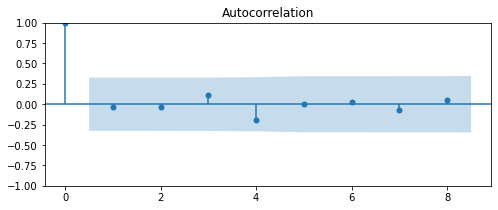

In [48]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(yearly_ts_diff, ax=ax, lags=8);

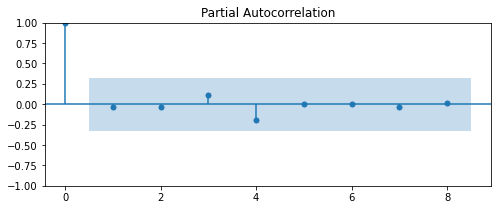

In [49]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(yearly_ts_diff, ax=ax, lags=8, method="ywm");

In [50]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,0) model
mod_arma = ARIMA(yearly_ts_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Total Renewable Electricity - TWh   No. Observations:                   36
Model:                                ARIMA(1, 0, 0)   Log Likelihood                 -51.118
Date:                               Sun, 11 Feb 2024   AIC                            108.235
Time:                                       15:09:30   BIC                            112.986
Sample:                                   12-31-1986   HQIC                           109.894
                                        - 12-31-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.255      0.007      0.994      -0.497       0.501
ar.L1      

The SARIMAX model was fitted to the time series data of Total Renewable Electricity Generation in Terawatt-hours (TWh) spanning from 1986 to 2022. The purpose of this analysis was to develop a predictive model for renewable electricity generation and evaluate its performance.

The model achieved a log likelihood of -143.028 and AIC of 292.056, indicating a reasonable fit to the data

The BIC value of 296.889 also suggests that the model adequately balances goodness of fit with complexity.

#### (b) Regression modelling

In [51]:
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,0.31,0.16,22.078002
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,0.50,0.09,22.169001
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,0.56,0.13,22.261000
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,0.63,0.31,22.353000
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,0.56,0.33,22.500000
...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4.30,3.05,32.236997
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,5.46,3.73,32.209000
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4.58,3.66,32.209998
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,4.19,3.40,32.242002


# 1. predicting for WIND

In [52]:
# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from wind - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                     'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from wind - TWh']


# Create pipelines for different regressors
pipeline_wind_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_wind_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_wind_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines = [pipeline_wind_rf, pipeline_wind_gb, pipeline_wind_linear]

# Fit and evaluate each model
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 3.1036144070089122
Mean Absolute Error (MAE): 0.2239430704634751
R-squared (R2) Score: 0.9974778699756074

Testing Set Metrics:
Mean Squared Error (MSE): 2630.2301394798374
Mean Absolute Error (MAE): 8.278047189866557
R-squared (R2) Score: 0.8460852943946443

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 2.9539081771766655
Mean Absolute Error (MAE): 0.5025981271835155
R-squared (R2) Score: 0.9975995276713076

Testing Set Metrics:
Mean Squared Error (MSE): 2118.263786607524
Mean Absolute Error (MAE): 8.08043580720192
R-squared (R2) Score: 0.8760443269900862

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 3.7521936289487116e-06
Mean Absolute Error (MAE): 0.0007568816214979433
R-squared (R2) Score: 0.9999999969508068

Testing Set Metrics:
Mean Squared Error (MSE): 4.281334242811104e-06
Mean Absolute Error (MAE): 0.0006689628295255724
R-squared (R2) Scor

In [103]:
# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity','Electricity from solar - TWh','Year']]
y_train = train_data['Electricity from wind - TWh']

X_test = test_data[['Entity','Electricity from solar - TWh','Year']]
y_test = test_data['Electricity from wind - TWh']


# Create pipelines for different regressors
pipeline_wind_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_wind_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_wind_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines = [pipeline_wind_rf, pipeline_wind_gb, pipeline_wind_linear]

# Fit and evaluate each model
for pipeline in pipelines:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 10.852925902606124
Mean Absolute Error (MAE): 0.4194301277439561
R-squared (R2) Score: 0.9911804474777357

Testing Set Metrics:
Mean Squared Error (MSE): 2997.6766713594607
Mean Absolute Error (MAE): 9.866380025555944
R-squared (R2) Score: 0.8245832121505614

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 9.704996360410673
Mean Absolute Error (MAE): 0.8665021006154466
R-squared (R2) Score: 0.9921133042004394

Testing Set Metrics:
Mean Squared Error (MSE): 2236.9888905394105
Mean Absolute Error (MAE): 10.1024149014877
R-squared (R2) Score: 0.8690968210873307

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 129.50126181913942
Mean Absolute Error (MAE): 3.323381704532729
R-squared (R2) Score: 0.8947617268778054

Testing Set Metrics:
Mean Squared Error (MSE): 5397.07375475483
Mean Absolute Error (MAE): 14.921093808885425
R-squared (R2) Score: 0.68417629863

In [53]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_wind_rf, pipeline_wind_gb, pipeline_wind_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [  8.84082184  11.4398562    9.65054684  34.01513437 165.17409673]
Mean CV MSE: 45.824091194558854

Model: GradientBoostingRegressor
Cross-Validation MSE: [ 9.55962894 33.68057009 19.35530074 36.53364687 99.44134422]
Mean CV MSE: 39.7140981723849

Model: LinearRegression
Cross-Validation MSE: [3.79613923e-06 4.81935756e-06 4.22637289e-06 3.98642441e-06
 4.03337191e-06]
Mean CV MSE: 4.172333201029076e-06


In [54]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [55]:
train_results

,Actual,Predicted
0,0.0,-0.000139
1,0.0,-0.000144
2,0.0,-0.000149
3,0.0,-0.000154
4,0.0,-0.000160
...,...,...
5789,0.0,-0.000187
5790,0.0,-0.000177
5791,0.0,-0.000180
5792,0.0,-0.000184


In [56]:
test_results

,Actual,Predicted
17,0.0,-0.000221
18,0.0,-0.000226
19,0.0,-0.000231
20,0.0,-0.000235
21,0.0,-0.000239
...,...,...
5794,0.0,-0.000221
5795,0.0,-0.000205
5796,0.0,-0.000214
5797,0.0,-0.000228


# 2. predicting for HYDRO

In [57]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from wind - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                       'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from hydro - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from wind - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                     'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from hydro - TWh']

# Define preprocessing steps for the pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_hydro_linear = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

pipeline_hydro_rf = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_hydro_gb = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_hydro = [pipeline_hydro_rf, pipeline_hydro_gb, pipeline_hydro_linear]

# Fit and evaluate each model
for pipeline in pipelines_hydro:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 14.850789163473635
Mean Absolute Error (MAE): 0.8472024306915237
R-squared (R2) Score: 0.9998091440213384

Testing Set Metrics:
Mean Squared Error (MSE): 804.7757244669505
Mean Absolute Error (MAE): 5.563310398585513
R-squared (R2) Score: 0.9936817076406834

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 120.46349112036071
Mean Absolute Error (MAE): 5.992268814554878
R-squared (R2) Score: 0.998451854831572

Testing Set Metrics:
Mean Squared Error (MSE): 1843.045031256133
Mean Absolute Error (MAE): 11.66401645952933
R-squared (R2) Score: 0.9855302577043125

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.1435770602163506e-07
Mean Absolute Error (MAE): 0.00016246672578972465
R-squared (R2) Score: 0.9999999999972452

Testing Set Metrics:
Mean Squared Error (MSE): 1.6413542529137228e-07
Mean Absolute Error (MAE): 0.00013437296659688257
R-squared (R2) Sco

In [58]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_hydro_rf, pipeline_hydro_gb, pipeline_hydro_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [285.44862019 130.94712169 102.89865615  85.36214043 122.13230079]
Mean CV MSE: 145.35776784659677

Model: GradientBoostingRegressor
Cross-Validation MSE: [347.80541855 343.56374188 225.52941744 286.12879868 192.2932342 ]
Mean CV MSE: 279.06412215050125

Model: LinearRegression
Cross-Validation MSE: [1.93197671e-07 2.69612968e-07 2.35972629e-07 2.86186854e-07
 2.36539285e-07]
Mean CV MSE: 2.4430188126255055e-07


In [59]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [60]:
train_results

,Actual,Predicted
0,0.31,0.310013
1,0.50,0.500009
2,0.56,0.560006
3,0.63,0.630002
4,0.56,0.560000
...,...,...
5789,5.34,5.339967
5790,4.95,4.949970
5791,5.38,5.379965
5792,4.94,4.939965


In [61]:
test_results

,Actual,Predicted
17,1.05,1.049963
18,0.93,0.929961
19,0.84,0.839959
20,0.62,0.619958
21,0.62,0.619956
...,...,...
5794,3.97,3.969960
5795,5.05,5.049955
5796,4.17,4.169958
5797,3.81,3.809956


# 3. predicting for SOLAR

In [62]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from wind - TWh', 'Other renewables including bioenergy - TWh', 
                      'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity from solar - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from wind - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity from solar - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_solar_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_solar_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_solar_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_solar = [pipeline_solar_rf, pipeline_solar_gb, pipeline_solar_linear]

# Fit and evaluate each model
for pipeline in pipelines_solar:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.8457371527060054
Mean Absolute Error (MAE): 0.07643956275459572
R-squared (R2) Score: 0.9913935480648497

Testing Set Metrics:
Mean Squared Error (MSE): 1464.87985855209
Mean Absolute Error (MAE): 5.47451159528029
R-squared (R2) Score: 0.6555251519777774

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.19230776266190922
Mean Absolute Error (MAE): 0.11595522635099746
R-squared (R2) Score: 0.9980430237564822

Testing Set Metrics:
Mean Squared Error (MSE): 1243.6130592952966
Mean Absolute Error (MAE): 5.103770946846419
R-squared (R2) Score: 0.7075573009634869

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 5.0117998352642535e-06
Mean Absolute Error (MAE): 0.001006501384101338
R-squared (R2) Score: 0.9999999489985579

Testing Set Metrics:
Mean Squared Error (MSE): 4.3980204064265515e-05
Mean Absolute Error (MAE): 0.001452365055468358
R-squared (R2) Sco

In [63]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_solar_rf, pipeline_solar_gb, pipeline_solar_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [ 2.88875711 20.97150878  3.77102885  1.17422193 33.95670513]
Mean CV MSE: 12.552444359252771

Model: GradientBoostingRegressor
Cross-Validation MSE: [ 1.94606854 13.17185102  4.35628903  0.97762967 24.45692552]
Mean CV MSE: 8.981752757137887

Model: LinearRegression
Cross-Validation MSE: [4.91423238e-06 8.61376388e-06 4.60259966e-06 4.46417781e-06
 1.08665685e-05]
Mean CV MSE: 6.692268451328412e-06


In [64]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [65]:
train_results

,Actual,Predicted
0,0.00,0.000452
1,0.00,0.000432
2,0.00,0.000409
3,0.00,0.000386
4,0.00,0.000361
...,...,...
5789,0.00,0.000190
5790,0.00,0.000165
5791,0.00,0.000149
5792,0.01,0.010116


In [66]:
test_results

,Actual,Predicted
17,0.04,0.040059
18,0.04,0.040033
19,0.05,0.050006
20,0.06,0.059977
21,0.08,0.079949
...,...,...
5794,0.01,0.010045
5795,0.02,0.020044
5796,0.03,0.030002
5797,0.03,0.029969


# 4. predicting for BIOENERGY

In [67]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Electricity from wind - TWh', 
                      'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Other renewables including bioenergy - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Electricity from wind - TWh', 
                    'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Other renewables including bioenergy - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_bioenergy_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_bioenergy_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_bioenergy_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_bioenergy = [pipeline_bioenergy_rf, pipeline_bioenergy_gb, pipeline_bioenergy_linear]

# Fit and evaluate each model
for pipeline in pipelines_bioenergy:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.607786772961625
Mean Absolute Error (MAE): 0.1473510091212507
R-squared (R2) Score: 0.9993004581871322

Testing Set Metrics:
Mean Squared Error (MSE): 142.189093062842
Mean Absolute Error (MAE): 2.3735259330572496
R-squared (R2) Score: 0.9558645881988234

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 2.237482445009299
Mean Absolute Error (MAE): 0.6566498317242979
R-squared (R2) Score: 0.9974247341411945

Testing Set Metrics:
Mean Squared Error (MSE): 143.6029763116779
Mean Absolute Error (MAE): 2.795765267258685
R-squared (R2) Score: 0.9554257196605834

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 1.1508497153758317e-05
Mean Absolute Error (MAE): 0.0013439299012227295
R-squared (R2) Score: 0.999999986754113

Testing Set Metrics:
Mean Squared Error (MSE): 8.285797442224651e-05
Mean Absolute Error (MAE): 0.0021210749034448685
R-squared (R2) Score: 

In [68]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_bioenergy_rf, pipeline_bioenergy_gb, pipeline_bioenergy_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [18.68490399  2.80366187  2.6084477   5.23758653 12.21949029]
Mean CV MSE: 8.31081807526941

Model: GradientBoostingRegressor
Cross-Validation MSE: [15.91506023  5.36299801  5.23251491  6.64948763 10.4567509 ]
Mean CV MSE: 8.723362336417242

Model: LinearRegression
Cross-Validation MSE: [1.53076908e-05 1.24609755e-05 1.14499342e-05 8.96695775e-06
 1.54018760e-05]
Mean CV MSE: 1.2717486852774753e-05


In [69]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [70]:
train_results

,Actual,Predicted
0,0.00,-0.000351
1,0.00,-0.000318
2,0.00,-0.000281
3,0.00,-0.000242
4,0.00,-0.000202
...,...,...
5789,0.34,0.340068
5790,0.41,0.410079
5791,0.41,0.410109
5792,0.42,0.420151


In [71]:
test_results

,Actual,Predicted
17,0.00,0.000282
18,0.00,0.000322
19,0.00,0.000362
20,0.00,0.000404
21,0.00,0.000444
...,...,...
5794,0.32,0.320294
5795,0.39,0.390278
5796,0.38,0.380339
5797,0.35,0.350398


# 5. predicting for TOTAL ELECTRICITY GENERATION

In [72]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Electricity generation - TWh']

X_test = test_data[['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Electricity generation - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_total_electricity_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_total_electricity_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_total_electricity_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_total_electricity = [pipeline_total_electricity_rf, pipeline_total_electricity_gb, pipeline_total_electricity_linear]

# Fit and evaluate each model
for pipeline in pipelines_total_electricity:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 343.5408134015153
Mean Absolute Error (MAE): 2.6750965365850408
R-squared (R2) Score: 0.999880334771796

Testing Set Metrics:
Mean Squared Error (MSE): 40820.871364774845
Mean Absolute Error (MAE): 29.07891502232765
R-squared (R2) Score: 0.991800313983162

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 192.3371755528306
Mean Absolute Error (MAE): 5.32671715129213
R-squared (R2) Score: 0.9999330033838578

Testing Set Metrics:
Mean Squared Error (MSE): 33556.61606481829
Mean Absolute Error (MAE): 27.85564648604647
R-squared (R2) Score: 0.9932594845156459

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.2030542724537457e-07
Mean Absolute Error (MAE): 0.00017435770369568274
R-squared (R2) Score: 0.9999999999999233

Testing Set Metrics:
Mean Squared Error (MSE): 2.356485000473085e-07
Mean Absolute Error (MAE): 0.00015699732990614808
R-squared (R2) Score: 

In [73]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_total_electricity_rf, pipeline_total_electricity_gb, pipeline_total_electricity_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [1552.67616924 3112.29170774 2018.80044258 2254.28826858 5716.85725222]
Mean CV MSE: 2930.982768071835

Model: GradientBoostingRegressor
Cross-Validation MSE: [2373.61289458 3953.05221262 2079.34756296 1832.21780399 3117.78609585]
Mean CV MSE: 2671.2033139983496

Model: LinearRegression
Cross-Validation MSE: [2.32001230e-07 2.63662548e-07 2.58731080e-07 2.31355277e-07
 2.65485348e-07]
Mean CV MSE: 2.50247096795105e-07


In [74]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [75]:
train_results

,Actual,Predicted
0,0.47,0.469992
1,0.59,0.589995
2,0.69,0.689998
3,0.94,0.940001
4,0.89,0.890004
...,...,...
5789,8.93,8.930022
5790,9.26,9.260021
5791,9.71,9.710024
5792,9.39,9.390027


In [76]:
test_results

,Actual,Predicted
17,1.27,1.270041
18,1.17,1.170044
19,1.07,1.070047
20,0.80,0.800050
21,0.83,0.830052
...,...,...
5794,7.35,7.350039
5795,9.19,9.190037
5796,8.24,8.240041
5797,7.59,7.590047


# 6. predicting for TOTAL RENEWABLE ELECTRICITY

In [77]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Electricity from wind - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_train = train_data['Total Renewable Electricity - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from wind - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_test = test_data['Total Renewable Electricity - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_total_renewable_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_total_renewable_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_total_renewable_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_total_renewable = [pipeline_total_renewable_rf, pipeline_total_renewable_gb, pipeline_total_renewable_linear]

# Fit and evaluate each model
for pipeline in pipelines_total_renewable:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 19.86090136425748
Mean Absolute Error (MAE): 0.6263356630402038
R-squared (R2) Score: 0.9998234472762167

Testing Set Metrics:
Mean Squared Error (MSE): 15945.069624870468
Mean Absolute Error (MAE): 18.308752436185614
R-squared (R2) Score: 0.9556237235039876

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 18.67477225710991
Mean Absolute Error (MAE): 1.5858052260844053
R-squared (R2) Score: 0.9998339913255923

Testing Set Metrics:
Mean Squared Error (MSE): 11975.47696130968
Mean Absolute Error (MAE): 15.316647127353063
R-squared (R2) Score: 0.9666713856189247

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.7346567486900086e-08
Mean Absolute Error (MAE): 6.161456800924429e-05
R-squared (R2) Score: 0.9999999999997569

Testing Set Metrics:
Mean Squared Error (MSE): 3.819305929713233e-08
Mean Absolute Error (MAE): 5.911237396952998e-05
R-squared (R2) Sco

In [78]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_total_renewable_rf, pipeline_total_renewable_gb, pipeline_total_renewable_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [182.66834585 179.20273697  65.327095   138.53097435 792.269099  ]
Mean CV MSE: 271.59965023377646

Model: GradientBoostingRegressor
Cross-Validation MSE: [229.8581188  422.4249676  193.99722185 206.40716542 474.22487657]
Mean CV MSE: 305.3824700494707

Model: LinearRegression
Cross-Validation MSE: [2.98002804e-08 3.19861631e-08 3.14815016e-08 2.76897998e-08
 3.68279905e-08]
Mean CV MSE: 3.155714707979058e-08


In [79]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [80]:
train_results

,Actual,Predicted
0,0.31,0.309996
1,0.50,0.499997
2,0.56,0.559998
3,0.63,0.629999
4,0.56,0.560000
...,...,...
5789,5.68,5.680006
5790,5.36,5.360006
5791,5.79,5.790007
5792,5.37,5.370008


In [81]:
test_results

,Actual,Predicted
17,1.09,1.090014
18,0.97,0.970015
19,0.89,0.890017
20,0.68,0.680018
21,0.70,0.700019
...,...,...
5794,4.30,4.300013
5795,5.46,5.460012
5796,4.58,4.580014
5797,4.19,4.190016


# 7. predicting for TOTAL ELECTRICITY from NON-RENEWABLES

In [82]:
# Filter the dataframe based on the year
train_data = modelling[modelling['Year'] <= 2016]
test_data = modelling[modelling['Year'] >= 2017]

# Select relevant columns for X and y
X_train = train_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                      'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                      'Electricity from wind - TWh', 'Year']]
y_train = train_data['Electricity from Non-Renewables - TWh']

X_test = test_data[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
                    'Electricity from wind - TWh', 'Year']]
y_test = test_data['Electricity from Non-Renewables - TWh']

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create pipelines for different regressors
pipeline_non_renewable_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_non_renewable_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_non_renewable_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# List of pipelines for easier iteration
pipelines_non_renewable = [pipeline_non_renewable_rf, pipeline_non_renewable_gb, pipeline_non_renewable_linear]

# Fit and evaluate each model
for pipeline in pipelines_non_renewable:
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate error metrics for training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print error metrics
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print('Training Set Metrics:')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'R-squared (R2) Score: {train_r2}')
    print('\nTesting Set Metrics:')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'R-squared (R2) Score: {test_r2}')


Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 293.5373129718561
Mean Absolute Error (MAE): 2.5795068163046744
R-squared (R2) Score: 0.9998429349868644

Testing Set Metrics:
Mean Squared Error (MSE): 30126.194969434342
Mean Absolute Error (MAE): 28.617362420853333
R-squared (R2) Score: 0.9887489103680906

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 183.71031123347993
Mean Absolute Error (MAE): 5.8799009683542565
R-squared (R2) Score: 0.9999017008701384

Testing Set Metrics:
Mean Squared Error (MSE): 11857.760320055797
Mean Absolute Error (MAE): 22.017977918514696
R-squared (R2) Score: 0.9955715375164369

Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.730662457345549e-07
Mean Absolute Error (MAE): 0.00019762049624340284
R-squared (R2) Score: 0.9999999999998539

Testing Set Metrics:
Mean Squared Error (MSE): 5.196442048606473e-07
Mean Absolute Error (MAE): 0.00020434137839399154
R-squared (R2) 

In [83]:
# Define number of folds for cross-validation
n_folds = 5

# Define KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# List of pipelines for easier iteration
pipelines = [pipeline_non_renewable_rf, pipeline_non_renewable_gb, pipeline_non_renewable_linear]

# Fit and evaluate each model using k-fold cross-validation
for pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Convert negative MSE to positive
    cv_scores = -cv_scores

    # Print cross-validation results
    print(f'\nModel: {pipeline.named_steps["regressor"].__class__.__name__}')
    print(f'Cross-Validation MSE: {cv_scores}')
    print(f'Mean CV MSE: {cv_scores.mean()}')



Model: RandomForestRegressor
Cross-Validation MSE: [1411.46316992 3305.51012671 1000.98994703 4811.66484278 1241.66986365]
Mean CV MSE: 2354.259590019777

Model: GradientBoostingRegressor
Cross-Validation MSE: [2109.91308516 2115.9151997  1612.3692604  1673.27398864 1019.18143974]
Mean CV MSE: 1706.1305947293804

Model: LinearRegression
Cross-Validation MSE: [3.05802051e-07 3.15815511e-07 3.19375949e-07 2.70583722e-07
 3.15798216e-07]
Mean CV MSE: 3.0547508957718845e-07


In [84]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [85]:
train_results

,Actual,Predicted
0,0.16,0.160016
1,0.09,0.090013
2,0.13,0.130009
3,0.31,0.310005
4,0.33,0.330001
...,...,...
5789,3.25,3.249981
5790,3.90,3.899981
5791,3.92,3.919978
5792,4.02,4.019974


In [86]:
test_results

,Actual,Predicted
17,0.18,0.179955
18,0.20,0.199951
19,0.18,0.179948
20,0.12,0.119943
21,0.13,0.129940
...,...,...
5794,3.05,3.049957
5795,3.73,3.729961
5796,3.66,3.659955
5797,3.40,3.399948


## EXPORT THE MODEL

In [87]:
import pickle

# Export pipeline_bioenergy_linear
with open('pipeline_bioenergy_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_bioenergy_linear, f)

# Export pipeline_hydro_linear
with open('pipeline_hydro_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_hydro_linear, f)

# Export pipeline_wind_linear
with open('pipeline_wind_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_wind_linear, f)

# Export pipeline_non_renewable_linear
with open('pipeline_non_renewable_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_non_renewable_linear, f)

# Export pipeline_solar_linear
with open('pipeline_solar_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_solar_linear, f)

# Export pipeline_total_electricity_linear
with open('pipeline_total_electricity_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_total_electricity_linear, f)

# Export pipeline_total_renewable_linear
with open('pipeline_total_renewable_linear.pkl', 'wb') as f:
    pickle.dump(pipeline_total_renewable_linear, f)


## LOAD THE MODEL

In [88]:
# Load trained models
pipeline_bioenergy_linear1 = pickle.load(open('pipeline_bioenergy_linear.pkl', 'rb'))
pipeline_hydro_linear1 = pickle.load(open('pipeline_hydro_linear.pkl', 'rb'))
pipeline_wind_linear1 = pickle.load(open('pipeline_wind_linear.pkl', 'rb'))
pipeline_non_renewable_linear1 = pickle.load(open('pipeline_non_renewable_linear.pkl', 'rb'))
pipeline_solar_linear1 = pickle.load(open('pipeline_solar_linear.pkl', 'rb'))
pipeline_total_electricity_linear1 = pickle.load(open('pipeline_total_electricity_linear.pkl', 'rb'))
pipeline_total_renewable_linear1 = pickle.load(open('pipeline_total_renewable_linear.pkl', 'rb'))

## MAKE A PREDICTION WITH LOADED MODEL

In [89]:
request_json = {}

expected_features = ('Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
        'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year')

example_values = ['Kenya', 12.36, 3.34, 0.3, 5.77, 11.09, 1.27, 2022]

for i, feature in enumerate(expected_features):
    request_json[feature] = example_values[i]
request_json

{'Entity': 'Kenya',
 'Electricity generation - TWh': 12.36,
 'Electricity from hydro - TWh': 3.34,
 'Electricity from solar - TWh': 0.3,
 'Other renewables including bioenergy - TWh': 5.77,
 'Total Renewable Electricity - TWh': 11.09,
 'Electricity from Non-Renewables - TWh': 1.27,
 'Year': 2022}

In [90]:
import pandas as pd

# Assuming request_json contains the input data
test_value = [request_json[feature] for feature in expected_features]

# Convert the input data to a DataFrame with a single row
test_df = pd.DataFrame([test_value], columns=expected_features)

# Predict using the pipeline
predicted_value = int(pipeline_wind_linear1.predict(test_df)[0])

# Rest of your code
response_json = {'prediction': predicted_value}


In [91]:
# Define input data for prediction
input_data = {'Entity': 'Zimbabwe',
 'Electricity generation - TWh': 8.03,
 'Electricity from hydro - TWh': 4,
 'Electricity from solar - TWh': 0.04,
 'Other renewables including bioenergy - TWh': 0.38,
 'Total Renewable Electricity - TWh': 4.42,
 'Electricity from Non-Renewables - TWh': 3.61,
 'Year': 2021}

input_df = pd.DataFrame([input_data])

# Predict using the deployed model
predicted_value = pipeline_wind_linear.predict(input_df)

# Display the prediction
print('Predicted Electricity from Wind (TWh):', predicted_value)


Predicted Electricity from Wind (TWh): [-0.00022417]


In [92]:
modelling.drop(columns=['Entity'], inplace= True)

In [93]:
modelling.corr()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
Year,1.000000,0.111438,-0.015924,0.108134,0.058999,-0.006927,0.019552,-0.014254,-0.044614
Electricity from wind - TWh,0.111438,1.000000,0.687538,0.955884,0.887679,0.732236,0.824331,0.699939,0.039199
Electricity from hydro - TWh,-0.015924,0.687538,1.000000,0.573121,0.883923,0.976824,0.977430,0.967853,0.011550
Electricity from solar - TWh,0.108134,0.955884,0.573121,1.000000,0.779552,0.610472,0.725559,0.572856,0.031587
Other renewables including bioenergy - TWh,0.058999,0.887679,0.883923,0.779552,1.000000,0.933441,0.949327,0.920598,0.044896
Electricity generation - TWh,-0.006927,0.732236,0.976824,0.610472,0.933441,1.000000,0.974692,0.998052,0.023747
Total Renewable Electricity - TWh,0.019552,0.824331,0.977430,0.725559,0.949327,0.974692,1.000000,0.958848,0.021345
Electricity from Non-Renewables - TWh,-0.014254,0.699939,0.967853,0.572856,0.920598,0.998052,0.958848,1.000000,0.024203
Urbanization,-0.044614,0.039199,0.011550,0.031587,0.044896,0.023747,0.021345,0.024203,1.000000


In [94]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
from joblib import load
import numpy as np

# Load the pre-trained model
model = load('your_model.pkl')

# Load the data
data = pd.read_csv('your_data.csv')

# Create the Dash application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Renewable Electricity Generation Prediction for Kenya"),
    html.Label("Select Year:"),
    dcc.Input(id='year-input', type='number', value=2023),
    html.Label("Select Electricity Source:"),
    dcc.Dropdown(
        id='source-dropdown',
        options=[
            {'label': 'Wind', 'value': 'Electricity from wind - TWh'},
            {'label': 'Solar', 'value': 'Electricity from solar - TWh'},
            {'label': 'Hydro', 'value': 'Electricity from hydro - TWh'},
            {'label': 'Bioenergy', 'value': 'Other renewables including bioenergy - TWh'}
        ],
        value='Electricity from wind - TWh'
    ),
    html.Div(id='prediction-output')
])

# Define callback to update prediction based on user input
@app.callback(
    Output('prediction-output', 'children'),
    [Input('year-input', 'value'),
     Input('source-dropdown', 'value')]
)
def update_prediction(year, source):
    # Make prediction for the selected year and source
    prediction = model.predict([[year]])
    return html.Div([
        html.H2(f"Predicted {source} for {year}: {np.round(prediction[0], 2)} TWh")
    ])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

# TIME SERIES MODELLING

In [ ]:
modelling

# Load 101

In [ ]:
modelling = pd.read_csv('modelling.csv')
modelling

In [ ]:
modelling.apply(pd.isnull).sum()/modelling.shape[0]

In [ ]:
# modelling.drop(columns=['Entity'], inplace=True)

In [ ]:
# Let's calculate the correlation matrix
corr_matrix = modelling.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the correlation matrix
corr = modelling.corr()

# Set a threshold for identifying highly correlated features
threshold = 0.7

# Identify highly correlated features
multicollinear_features = []

def find_multicollinear_features(feature):
    multicollinear = corr[feature][(corr[feature] >= threshold) & (corr.index != feature)]
    if not multicollinear.empty:
        multicollinear_features.extend([(feature, idx, round(corr[feature][idx], 2)) for idx, _ in multicollinear.items()])

# Loop through features to find highly correlated pairs
for feature in corr:
    find_multicollinear_features(feature)

# Create a DataFrame of highly correlated features
MC_df = pd.DataFrame(multicollinear_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
print('Highly Correlated Features')
display(MC_df)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' contains your feature variables and 'y' contains the target variable
X = modelling.drop(columns=['Total Renewable Electricity - TWh'])
y = modelling['Total Renewable Electricity - TWh']

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
# Assuming 'X' contains your feature variables and 'y' contains the target variable
X = modelling.drop(columns=['Electricity from solar - TWh'])
y = modelling['Electricity from solar - TWh']

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
modelling.columns

In [ ]:
# Filter data for the years 2000 to 2022
modelling_filtered = modelling[(modelling['Year'] >= 2000) & (modelling['Year'] <= 2022)]
modelling_filtered

In [ ]:
modelling_filtered['Year'] = pd.to_datetime(modelling_filtered['Year'], format='%Y').dt.year

In [ ]:
# Set 'Year' column as index
modelling_filtered.set_index('Year', inplace=True)

In [ ]:
modelling_filtered

In [ ]:
modelling_filtered.to_csv('modelling_filtered.csv', index=False)

In [ ]:
core_modelling = modelling_filtered[['Electricity from hydro - TWh', 'Electricity generation - TWh']].copy()

In [ ]:
core_modelling

In [ ]:
core_modelling.columns = ['hydro', 'total_generation']

In [ ]:
core_modelling

In [ ]:
core_modelling[['hydro', 'total_generation', 'bioenergy', 'solar']].plot()

In [ ]:
core_modelling.index.value_counts().sort_index()

In [ ]:
core_modelling['target'] = core_modelling.shift(-1)['hydro']

In [ ]:
core_modelling

In [ ]:
core_modelling = core_modelling.iloc[:-1,:].copy()

In [ ]:
core_modelling

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [ ]:
predictors = ['hydro','total_generation']

In [ ]:
train = core_modelling.loc[core_modelling.index <= 2016]
test = core_modelling.loc[core_modelling.index >= 2017]

In [ ]:
reg.fit(train[predictors], train['target'])

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test['target'], predictions)

In [ ]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']

In [ ]:
combined

In [ ]:
reg.coef_

In [ ]:
core_modelling['yearly_max'] = core_modelling['hydro'].rolling(5).mean()

In [ ]:
core_modelling

In [ ]:
core_modelling['max_min'] = core_modelling['yearly_max'] / core_modelling['hydro']

In [ ]:
core_modelling

In [ ]:
predictors = ['hydro','total_generation', 'yearly_max']

In [ ]:
def create_predictions(predictors, core_weather, reg):
    train = core_modelling.loc[core_modelling.index <= 2016]
    test = core_modelling.loc[core_modelling.index >= 2017]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [ ]:
core_modelling = core_modelling.iloc[5:, :].copy()

In [ ]:
core_modelling

In [ ]:
core_modelling.isna().sum()

In [ ]:
core_modelling

In [ ]:
error, combined = create_predictions(predictors, core_modelling, reg)

In [ ]:
error

In [ ]:
combined

In [ ]:
# Filter data for the years 2000 to 2022
modelling_filtered = modelling[(modelling['Year'] >= 2000) & (modelling['Year'] <= 2022)]

In [ ]:
modelling_filtered

In [ ]:
modelling_filtered['Year'] = pd.to_datetime(modelling_filtered['Year'], format='%Y').dt.year

In [ ]:
modelling_filtered.set_index('Year', inplace=True)

In [ ]:
modelling_filtered

In [ ]:
modelling_filtered.columns

In [ ]:
# Plot 'Electricity from hydro - TWh' for the world
modelling_filtered.loc[modelling_filtered['Entity'] == 'World', 'Electricity generation - TWh'].plot(figsize=(15,6))
plt.title('Electricity generation - TWh in the World (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Electricity generation - TWh')
plt.show()

# TRAIN/TEST SPLIT

In [ ]:
train = modelling_filtered.loc[modelling_filtered.index < 2017]
test = modelling_filtered.loc[modelling_filtered.index >= 2017]

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
train.loc[train['Entity'] == 'World', 'Electricity generation - TWh'].plot(ax=ax, label= 'Training set')
test.loc[test['Entity'] == 'World', 'Electricity generation - TWh'].plot(ax=ax, label= 'Test set')
ax.axvline(2017, color = 'black', ls='--')
plt.show()

# Create our Model

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    return df

df = create_features(modelling_filtered)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
df.columns

In [ ]:
FEATURES = ['Entity', 'Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']
TARGET = ['Electricity generation - TWh']

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

# new idea

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
# Filter the dataset to include only data for Kenya
solar_series_kenya = modelling_filtered[modelling_filtered['Entity'] == 'Kenya']['Electricity from solar - TWh']

In [ ]:
# Use auto_arima to find the best ARIMA parameters (non-seasonal as the data is annual)
stepwise_fit = auto_arima(solar_series_kenya, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, trace=True)

In [ ]:
# Fit ARIMA model
model = ARIMA(solar_series_kenya, order=stepwise_fit.order)
model_fit = model.fit()

In [ ]:
# Forecast for the next 4 years (2022-2025)
forecast = model_fit.forecast(steps=10)

In [ ]:
# The forecast for 2025
solar_forecast_2025 = forecast.iloc[-1]

In [ ]:
print(f"Predicted solar electricity generation for Kenya in 2025: {solar_forecast_2025} TWh")

In [ ]:
modelling.columns

# ARIMA

In [ ]:
import itertools

In [ ]:
!pip install --upgrade statsmodels pandas

In [ ]:
import statsmodels.api as sm

In [ ]:
p = d = q = range(0,2)

pdq = list(itertools.product(pdq))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

## NULLS

In [95]:
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,0.31,0.16,22.078002
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,0.50,0.09,22.169001
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,0.56,0.13,22.261000
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,0.63,0.31,22.353000
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,0.56,0.33,22.500000
...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4.30,3.05,32.236997
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,5.46,3.73,32.209000
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4.58,3.66,32.209998
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,4.19,3.40,32.242002


In [100]:
# Filter data for Zimbabwe and select only 'Electricity from solar - TWh' and 'Year' columns
kenya_solar_data = modelling.loc[modelling['Entity'] == 'Kenya', ['Electricity from solar - TWh', 'Year']]

# Split data into features (X) and target (y)
X_solar = kenya_solar_data[['Year']]
y_solar = kenya_solar_data['Electricity from solar - TWh']

# Train a model using historical solar data only
solar_model = LinearRegression()
solar_model.fit(X_solar, y_solar)

# Predict solar electricity for 2023
predicted_solar_2023 = solar_model.predict([[2022]])
print('Predicted Solar Electricity for 2023 (using historical solar data only):', predicted_solar_2023)


Predicted Solar Electricity for 2023 (using historical solar data only): [0.08961039]


In [101]:
# Assuming you have a DataFrame named modelling with columns 'Entity', 'Electricity from solar - TWh', 'Electricity from wind - TWh', 'Electricity from hydro - TWh', and 'Year'
# You can use linear regression or other methods to extrapolate missing values for 2023
# Here's an example using linear regression
from sklearn.linear_model import LinearRegression

# Filter data for Zimbabwe and select relevant columns
kenya_data = modelling[modelling['Entity'] == 'Kenya']

# Split data into features (X) and target (y)
X_extrapolate = kenya_data[['Year']]
y_solar_extrapolate = kenya_data['Electricity from solar - TWh']

# Train a linear regression model
solar_model_extrapolate = LinearRegression()
solar_model_extrapolate.fit(X_extrapolate, y_solar_extrapolate)

# Predict solar electricity for 2022
predicted_solar_2022_extrapolate = solar_model_extrapolate.predict([[2022]])
print('Predicted Solar Electricity for 2022 (extrapolated):', predicted_solar_2022_extrapolate)


Predicted Solar Electricity for 2022 (extrapolated): [0.08961039]


In [ ]:
from flask import Flask, render_template, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Load trained models
pipeline_bioenergy_linear = pickle.load(open('pipeline_bioenergy_linear.pkl', 'rb'))
pipeline_hydro_linear = pickle.load(open('pipeline_hydro_linear.pkl', 'rb'))
pipeline_wind_linear = pickle.load(open('pipeline_wind_linear.pkl', 'rb'))
pipeline_non_renewable_linear = pickle.load(open('pipeline_non_renewable_linear.pkl', 'rb'))
pipeline_solar_linear = pickle.load(open('pipeline_solar_linear.pkl', 'rb'))
pipeline_total_electricity_linear = pickle.load(open('pipeline_total_electricity_linear.pkl', 'rb'))
pipeline_total_renewable_linear = pickle.load(open('pipeline_total_renewable_linear.pkl', 'rb'))

# Function to preprocess input data
def preprocess_input(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data, index=[0])

    # Add default values for missing columns
    for column in ['Entity', 'Year']:
        if column not in df.columns:
            df[column] = 'Unknown'

    return df

# Define routes
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data
    data = request.json

    # Preprocess input data
    input_df = preprocess_input(data)

    # Choose the model based on user's choice
    model_choice = data['model']

    if model_choice == 'bioenergy':
        pipeline = pipeline_bioenergy_linear
    elif model_choice == 'hydro':
        pipeline = pipeline_hydro_linear
    elif model_choice == 'wind':
        pipeline = pipeline_wind_linear
    elif model_choice == 'non_renewable':
        pipeline = pipeline_non_renewable_linear
    elif model_choice == 'solar':
        pipeline = pipeline_solar_linear
    elif model_choice == 'total_electricity':
        pipeline = pipeline_total_electricity_linear
    elif model_choice == 'total_renewable':
        pipeline = pipeline_total_renewable_linear
    else:
        return jsonify({'error': 'Invalid model choice'})

    # Make prediction using the selected pipeline
    prediction = pipeline.predict(input_df)

    # Return prediction as JSON response
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
